In [3]:
import pandas as pd
import numpy as np

# Load datasets
features_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
labels_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")

print("Data Loaded Successfully")


Data Loaded Successfully


In [4]:
features_df.rename(columns={0: "txId", 1: "time_step"}, inplace=True)
print("Columns Renamed")


Columns Renamed


In [5]:
merged_df = features_df.merge(labels_df, on="txId", how="left")
print("Data Merged Successfully")


Data Merged Successfully


In [6]:
merged_df["class"] = merged_df["class"].replace({"2": 1, "unknown": np.nan}).astype(float)
print("Class Labels Processed")


Class Labels Processed


In [7]:
print(merged_df.isnull().sum())


txId              0
time_step         0
2                 0
3                 0
4                 0
              ...  
163               0
164               0
165               0
166               0
class        157205
Length: 168, dtype: int64


In [8]:
# Drop rows where class is NaN
merged_df = merged_df.dropna(subset=["class"])

# Check again
print(merged_df.isnull().sum())
print("Shape after dropping NaN:", merged_df.shape)


txId         0
time_step    0
2            0
3            0
4            0
            ..
163          0
164          0
165          0
166          0
class        0
Length: 168, dtype: int64
Shape after dropping NaN: (46564, 168)


In [9]:
# Fill NaN values in class with -1
merged_df["class"].fillna(-1, inplace=True)

# Check again
print(merged_df.isnull().sum())
print("Shape after filling NaN:", merged_df.shape)


txId         0
time_step    0
2            0
3            0
4            0
            ..
163          0
164          0
165          0
166          0
class        0
Length: 168, dtype: int64
Shape after filling NaN: (46564, 168)


C:\Users\rathi\AppData\Local\Temp\ipykernel_8936\3374473733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["class"].fillna(-1, inplace=True)


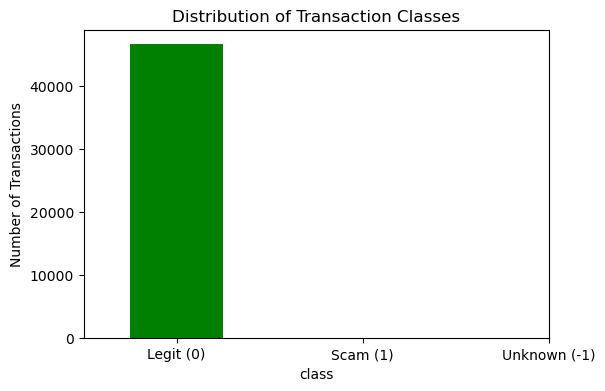

In [10]:
import matplotlib.pyplot as plt

# Count class distribution
class_counts = merged_df["class"].value_counts()

# Plot distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.xticks(ticks=[0, 1, 2], labels=["Legit (0)", "Scam (1)", "Unknown (-1)"], rotation=0)
plt.ylabel("Number of Transactions")
plt.title("Distribution of Transaction Classes")
plt.show()


<Figure size 1200x600 with 0 Axes>

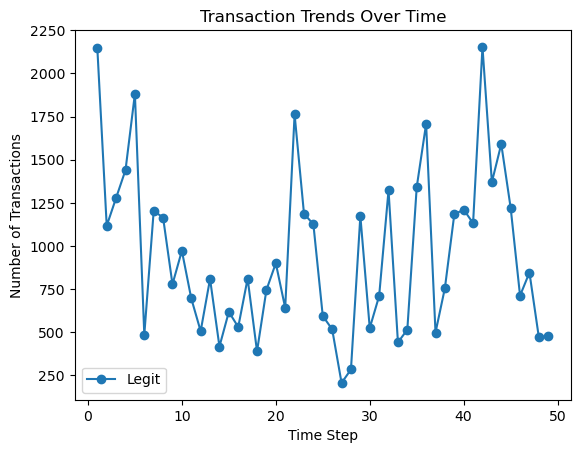

In [11]:
import seaborn as sns

# Group by time_step and count transactions
time_series = merged_df.groupby("time_step")["class"].value_counts().unstack()

# Plot time trends
plt.figure(figsize=(12, 6))
time_series.plot(kind="line", marker="o")
plt.xlabel("Time Step")
plt.ylabel("Number of Transactions")
plt.title("Transaction Trends Over Time")
plt.legend(["Legit", "Scam", "Unknown"])
plt.show()


In [12]:
print(merged_df["class"].value_counts())


class
1.0    46564
Name: count, dtype: int64


In [13]:
print(merged_df["class"].unique())


[1.]


In [14]:
import pandas as pd

# Load the original class labels file again
classes_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")

# Check unique class values
print(classes_df["class"].unique())

# Check distribution of classes
print(classes_df["class"].value_counts())


['unknown' '2' '1']
class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64


In [15]:
# Convert labels to numeric values
class_mapping = {"unknown": -1, "2": 0, "1": 1}  # Map legit (2) → 0, scam (1) → 1, unknown → -1
classes_df["class"] = classes_df["class"].map(class_mapping)

# Merge again with corrected labels
merged_df = features_df.merge(classes_df, on="txId", how="left")

# Fill missing values with -1 (Unknown)
merged_df["class"].fillna(-1, inplace=True)

# Check if legit (0) and scam (1) transactions exist
print(merged_df["class"].value_counts())


class
-1    157205
 0     42019
 1      4545
Name: count, dtype: int64


C:\Users\rathi\AppData\Local\Temp\ipykernel_8936\746593544.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["class"].fillna(-1, inplace=True)


In [16]:
# Remove unknown transactions (-1)
filtered_df = merged_df[merged_df["class"] != -1]

# Check the new shape
print("Shape after removing unknowns:", filtered_df.shape)

# Verify the class distribution
print(filtered_df["class"].value_counts())


Shape after removing unknowns: (46564, 168)
class
0    42019
1     4545
Name: count, dtype: int64


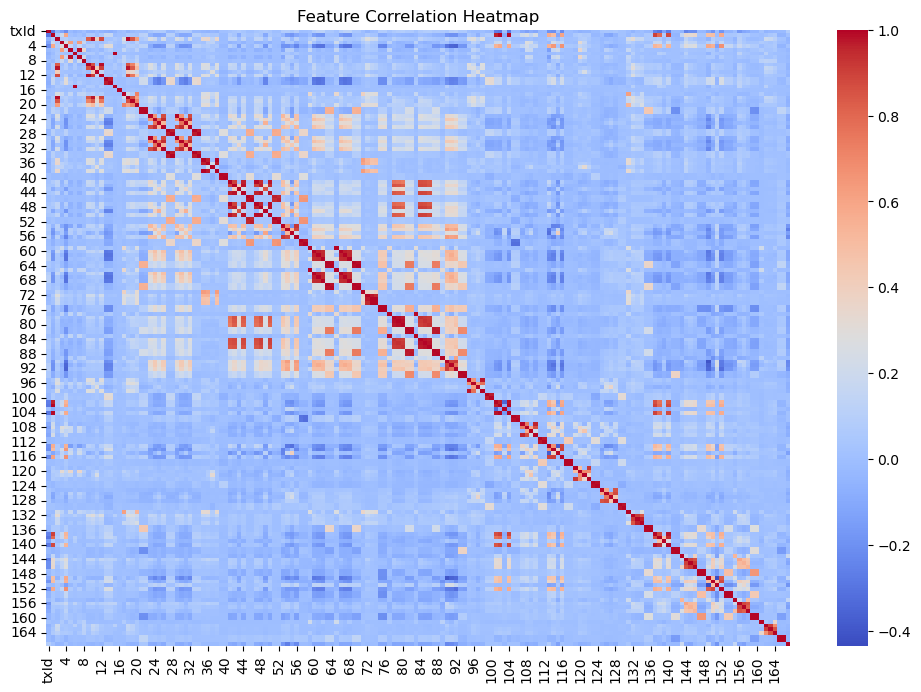

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = filtered_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")

# Title
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
import numpy as np

# Compute absolute correlations with the target variable 'class'
corr_with_target = filtered_df.corr()["class"].abs().sort_values(ascending=False)

# Display top 10 most important features
print("Top 10 Features Most Correlated with Class:\n")
print(corr_with_target[1:11])  # Excluding 'class' itself


Top 10 Features Most Correlated with Class:

54     0.261472
90     0.227629
56     0.227146
91     0.221294
143    0.191936
151    0.187232
92     0.185804
53     0.171799
155    0.152966
55     0.142125
Name: class, dtype: float64


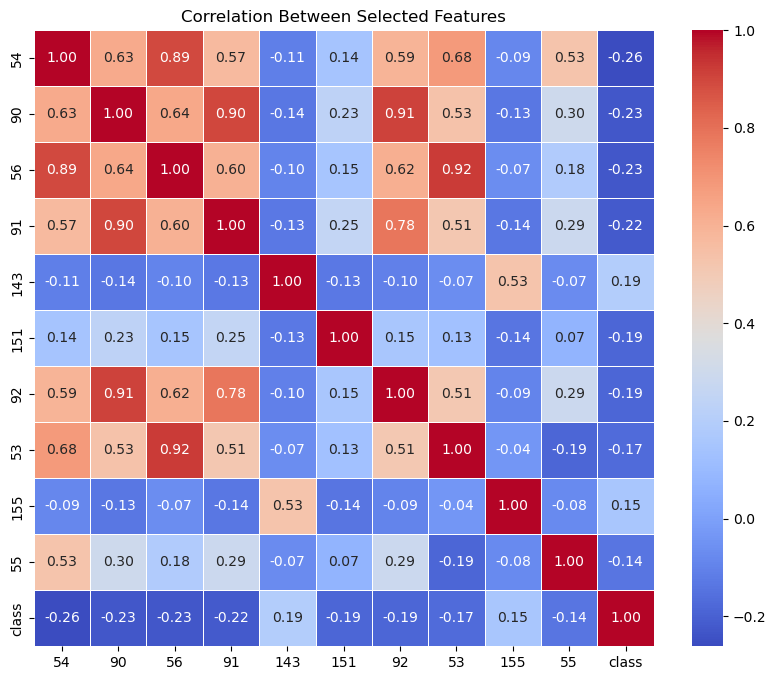

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the top 10 features + class for correlation check
selected_features = [54, 90, 56, 91, 143, 151, 92, 53, 155, 55, "class"]
corr_matrix = filtered_df[selected_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Selected Features")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

# Selecting final features
final_features = [54, 90, 56, 91, 143, 151, 155, 55]

X = filtered_df[final_features]
y = filtered_df["class"]  # Target variable

# Splitting dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (37251, 8)
Test set shape: (9313, 8)


In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train & evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"📊 **{name} Performance:**")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"🎯 Precision: {precision:.4f}")
    print(f"📢 Recall: {recall:.4f}")
    print(f"🔥 F1-Score: {f1:.4f}\n")


📊 **Random Forest Performance:**
✅ Accuracy: 0.9790
🎯 Precision: 0.9747
📢 Recall: 0.8053
🔥 F1-Score: 0.8819

📊 **Logistic Regression Performance:**
✅ Accuracy: 0.9056
🎯 Precision: 0.6415
📢 Recall: 0.0748
🔥 F1-Score: 0.1340

📊 **Gradient Boosting Performance:**
✅ Accuracy: 0.9750
🎯 Precision: 0.9681
📢 Recall: 0.7690
🔥 F1-Score: 0.8571



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='f1', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters
print("✅ Best Parameters:", random_search.best_params_)

# Train the best model
best_rf = random_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)

print("\n📊 **Optimized Random Forest Performance:**")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"📢 Recall: {recall:.4f}")
print(f"🔥 F1-Score: {f1:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 138}

📊 **Optimized Random Forest Performance:**
✅ Accuracy: 0.9788
🎯 Precision: 0.9747
📢 Recall: 0.8042
🔥 F1-Score: 0.8813


In [24]:
import pickle  

# Save the trained model  
with open("bitcoin_scam_model.pkl", "wb") as file:  
    pickle.dump(random_search.best_estimator_, file)  

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [25]:
# Load the trained model
with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

# Predict if a transaction is a scam (Example: Using first row of test data)
sample_transaction = X_test.iloc[0].values.reshape(1, -1)  # Take one sample
prediction = model.predict(sample_transaction)

# Show result
if prediction[0] == 1:
    print("⚠️ This transaction is a **SCAM**")
else:
    print("✅ This transaction is **LEGIT**")


✅ This transaction is **LEGIT**


In [26]:
import pickle

# Load the trained model
with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

print("✅ Model Loaded Successfully!")


✅ Model Loaded Successfully!


In [27]:
import pandas as pd

# Load datasets
features_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
labels_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")

# Rename columns for clarity
labels_df.columns = ['txId', 'label']
features_df.rename(columns={0: 'txId'}, inplace=True)

# Merge features and labels
df = features_df.merge(labels_df, on="txId", how="left")

# Drop missing values
df.dropna(inplace=True)

print("✅ Dataset Loaded & Merged Successfully!")


✅ Dataset Loaded & Merged Successfully!


In [28]:
# Choose a specific transaction by its txId
transaction_id = 101  # Change this to test different transactions

# Find the row index for this transaction
transaction_data = df[df['txId'] == transaction_id]

if transaction_data.empty:
    print("⚠️ Transaction ID not found!")
else:
    # Extract features only (remove 'txId' and 'label' columns)
    transaction_features = transaction_data.drop(columns=['txId', 'label']).values.reshape(1, -1)

    # Make prediction
    prediction = model.predict(transaction_features)[0]

    # Display result
    if prediction == 1:
        print(f"❌ Transaction {transaction_id} is a SCAM!")
    else:
        print(f"✅ Transaction {transaction_id} is LEGIT!")


⚠️ Transaction ID not found!


In [29]:
print("Available Transaction IDs:")
print(df['txId'].head(10))  # Shows first 10 transaction IDs
print(f"Total Transactions: {df.shape[0]}")


Available Transaction IDs:
0    230425980
1      5530458
2    232022460
3    232438397
4    230460314
5    230459870
6    230333930
7    230595899
8    232013274
9    232029206
Name: txId, dtype: int64
Total Transactions: 203769


In [30]:
print(df.columns)


Index([ 'txId',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           158,     159,     160,     161,     162,     163,     164,     165,
           166, 'label'],
      dtype='object', length=168)


In [31]:
selected_features = list(range(1, 167))  # Selecting features from column 1 to 166


In [32]:
print("Features used during training:", selected_features)


Features used during training: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166]


In [33]:
import pickle

with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

print("Model expects", model.n_features_in_, "features")


Model expects 8 features


In [34]:
print("Model expects", model.n_features_in_, "features")


Model expects 8 features


In [35]:
print(features_df.columns)


Index(['txId',      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
          157,    158,    159,    160,    161,    162,    163,    164,    165,
          166],
      dtype='object', length=167)


In [36]:
print("Model expects", model.n_features_in_, "features")



Model expects 8 features


In [37]:
# Load the model
import pickle
import pandas as pd

with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define the final selected features
final_features = [54, 90, 56, 91, 143, 151, 155, 55]

# Function to check if a transaction is a scam
def check_transaction(transaction_id, df):
    # Find the transaction in the dataset
    transaction_data = df[df["txId"] == transaction_id]

    if transaction_data.empty:
        print("⚠️ Transaction ID not found! Please try a different ID.")
        return
    
    # Extract only the required features
    transaction_features = transaction_data[final_features].values.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(transaction_features)[0]

    # Display result
    print("\n🔍 Transaction Details:")
    print(transaction_data)

    if prediction == 1:
        print("\n🚨 This transaction is a **SCAM**!")
    else:
        print("\n✅ This transaction is **SAFE**.")

# Example usage
features_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
labels_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
transaction_id = 230425980  # Change this to test different transactions
check_transaction(transaction_id, df)



🔍 Transaction Details:
        txId  1         2         3         4        5         6         7  \
0  230425980  1 -0.171469 -0.184668 -1.201369 -0.12197 -0.043875 -0.113002   

          8         9  ...       158      159       160       161      162  \
0 -0.061584 -0.162097  ... -0.600999  1.46133  1.461369  0.018279 -0.08749   

        163       164       165       166    label  
0 -0.131155 -0.097524 -0.120613 -0.119792  unknown  

[1 rows x 168 columns]

✅ This transaction is **SAFE**.


In [38]:
# Load the model
import pickle
import pandas as pd

with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define the final selected features
final_features = [54, 90, 56, 91, 143, 151, 155, 55]

# Function to check if a transaction is a scam
def check_transaction(transaction_id, df):
    # Find the transaction in the dataset
    transaction_data = df[df["txId"] == transaction_id]

    if transaction_data.empty:
        print("⚠️ Transaction ID not found! Please try a different ID.")
        return
    
    # Extract only the required features
    transaction_features = transaction_data[final_features].values.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(transaction_features)[0]

    # Display result
    print("\n🔍 Transaction Details:")
    print(transaction_data)

    if prediction == 1:
        print("\n🚨 This transaction is a **SCAM**!")
    else:
        print("\n✅ This transaction is **SAFE**.")

# Example usage
features_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
labels_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
transaction_id = 232029206  # Change this to test different transactions
check_transaction(transaction_id, df)


🔍 Transaction Details:
        txId  1         2         3         4         5         6         7  \
9  232029206  1 -0.005027  0.578941 -0.091383  4.380281 -0.063725  4.667146   

          8         9  ...       158       159       160      161       162  \
9  0.851305 -0.163645  ... -0.613614  0.241128  0.241406  0.60412  0.008632   

        163       164       165       166  label  
9 -0.131155  0.333211 -0.120613 -0.119792      2  

[1 rows x 168 columns]

✅ This transaction is **SAFE**.


In [39]:
import pickle
import pandas as pd

# Load the trained model
with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define the final selected features
final_features = [54, 90, 56, 91, 143, 151, 155, 55]

# Function to check if a transaction is a scam
def check_transaction(transaction_id, df):
    # Find the transaction in the dataset
    transaction_data = df[df["txId"] == transaction_id]

    if transaction_data.empty:
        print("⚠️ Transaction ID not found! Please try a different ID.")
        return
    
    # Extract only the required features
    transaction_features = transaction_data[final_features].values.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(transaction_features)[0]

    # Display transaction details
    print("\n🔍 Transaction Details:")
    print(transaction_data)

    if prediction == 1:
        print("\n🚨 This transaction is a **SCAM**!")
    else:
        print("\n✅ This transaction is **SAFE**.")

# Example usage
features_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
labels_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv") # Load your dataset
transaction_ids = [230425980, 230425981, 230459870]  # List of transaction IDs to test

# Check each transaction
for tx_id in transaction_ids:
    check_transaction(tx_id, df)



🔍 Transaction Details:
        txId  1         2         3         4        5         6         7  \
0  230425980  1 -0.171469 -0.184668 -1.201369 -0.12197 -0.043875 -0.113002   

          8         9  ...       158      159       160       161      162  \
0 -0.061584 -0.162097  ... -0.600999  1.46133  1.461369  0.018279 -0.08749   

        163       164       165       166    label  
0 -0.131155 -0.097524 -0.120613 -0.119792  unknown  

[1 rows x 168 columns]

✅ This transaction is **SAFE**.
⚠️ Transaction ID not found! Please try a different ID.

🔍 Transaction Details:
        txId  1        2         3         4         5         6         7  \
5  230459870  1  0.96104 -0.081127 -1.201369  1.303743  0.333276  1.480381   

          8         9  ...       158      159       160       161       162  \
5 -0.061584 -0.163577  ... -0.422589 -0.22679 -0.117629  0.018279  0.277775   

        163       164       165      166    label  
5  0.413931  1.149556 -0.696053 -0.69554  unknown  

In [40]:
# Load the model
import pickle
import pandas as pd

with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define the final selected features
final_features = [54, 90, 56, 91, 143, 151, 155, 55]

# Function to check if a transaction is a scam
def check_transaction(transaction_id, df):
    # Find the transaction in the dataset
    transaction_data = df[df["txId"] == transaction_id]

    if transaction_data.empty:
        print("⚠️ Transaction ID not found! Please try a different ID.")
        return
    
    # Extract only the required features
    transaction_features = transaction_data[final_features].values.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(transaction_features)[0]

    # Display result
    print("\n🔍 Transaction Details:")
    print(transaction_data)

    if prediction == 1:
        print("\n🚨 This transaction is a **SCAM**!")
    else:
        print("\n✅ This transaction is **SAFE**.")

# Example usage
features_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
labels_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
transaction_id = 203743   # Change this to test different transactions
check_transaction(transaction_id, df)

⚠️ Transaction ID not found! Please try a different ID.


In [42]:
# Load the model
import pickle
import pandas as pd

with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define the final selected features
final_features = [54, 90, 56, 91, 143, 151, 155, 55]

# Function to check if a transaction is a scam
def check_transaction(transaction_id, df):
    # Find the transaction in the dataset
    transaction_data = df[df["txId"] == transaction_id]

    if transaction_data.empty:
        print("⚠️ Transaction ID not found! Please try a different ID.")
        return
    
    # Extract only the required features
    transaction_features = transaction_data[final_features].values.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(transaction_features)[0]

    # Display result
    print("\n🔍 Transaction Details:")
    print(transaction_data)

    if prediction == 1:
        print("\n🚨 This transaction is a **SCAM**!")
    else:
        print("\n✅ This transaction is **SAFE**.")

# Example usage
features_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
labels_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
transaction_id = 230471924  # Change this to test different transactions
check_transaction(transaction_id, df)


🔍 Transaction Details:
          txId  1         2         3         4        5         6         7  \
231  230471924  1 -0.166866 -0.132897 -1.201369 -0.12197 -0.063725 -0.113002   

            8         9  ...       158       159       160       161      162  \
231 -0.061584 -0.157386  ... -0.613614  0.241128  0.241406  0.018279 -0.08749   

          163       164       165       166    label  
231 -0.131155 -0.097524 -0.120613 -0.119792  unknown  

[1 rows x 168 columns]

🚨 This transaction is a **SCAM**!


In [43]:
!pip install streamlit


In [50]:
import pandas as pd
import numpy as np

# Example input features
features = np.array([[-0.4883, -0.762, -0.4676, -0.6942, -0.1481, -1.0599, -0.2168, -0.2326]])

# Print the input features
print("Input Features for Prediction:", features)


Input Features for Prediction: [[-0.4883 -0.762  -0.4676 -0.6942 -0.1481 -1.0599 -0.2168 -0.2326]]


In [52]:
prediction = model.predict(features)  # Predict the transaction type
print("Raw Model Output:", prediction)


Raw Model Output: [0]


In [54]:
import pickle

# Load the model
with open("bitcoin_scam_model.pkl", "rb") as f:
    model = pickle.load(f)

# Check if the model is valid
print(model)


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=138,
                       random_state=42)


In [56]:
labels_df.value_counts()


txId       class  
1076       unknown    1
225295249  unknown    1
225295260  unknown    1
225295503  unknown    1
225295506  unknown    1
                     ..
96381166   unknown    1
96381175   unknown    1
96381589   unknown    1
96382039   unknown    1
403244581  unknown    1
Name: count, Length: 203769, dtype: int64

In [58]:
labels_df['class'].value_counts()


class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64

In [60]:
# Load the model
import pickle
import pandas as pd

with open("bitcoin_scam_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define the final selected features
final_features = [54, 90, 56, 91, 143, 151, 155, 55]

# Function to check if a transaction is a scam
def check_transaction(transaction_id, df):
    # Find the transaction in the dataset
    transaction_data = df[df["txId"] == transaction_id]

    if transaction_data.empty:
        print("⚠️ Transaction ID not found! Please try a different ID.")
        return
    
    # Extract only the required features
    transaction_features = transaction_data[final_features].values.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(transaction_features)[0]

    # Display result
    print("\n🔍 Transaction Details:")
    print(transaction_data)

    if prediction == 1:
        print("\n🚨 This transaction is a **SCAM**!")
    else:
        print("\n✅ This transaction is **SAFE**.")

# Example usage
features_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
labels_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges_df = pd.read_csv("C:/Users/rathi/Downloads/archive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
transaction_id = 232431894  # Change this to test different transactions
check_transaction(transaction_id, df)


🔍 Transaction Details:
           txId  1         2         3         4        5         6         7  \
2311  232431894  1 -0.172776 -0.184668 -1.201369 -0.12197 -0.063725 -0.113002   

             8         9  ...       158       159       160       161  \
2311 -0.061584 -0.163434  ...  0.786637  0.241128  0.241406 -0.098889   

           162       163       164       165       166    label  
2311 -0.106715 -0.131155 -0.183671 -0.120613 -0.119792  unknown  

[1 rows x 168 columns]

🚨 This transaction is a **SCAM**!
